In [227]:
#dependencies and setup
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress

In [228]:
#set file paths
graduation_data = Path("resources/graduation_data.csv")
state_data = Path("resources/state_data.csv")


In [229]:
#read the csvs
graduation_data_df = pd.read_csv(graduation_data)
state_data_df = pd.read_csv(state_data)



In [230]:
graduation_data_copy = graduation_data_df.copy()

In [231]:
#remove training dots from the State column
graduation_data_copy["State"] = graduation_data_copy['State'].str.replace(r'\.+$', '', regex=True)
graduation_data_copy.head()


,State,2012-13
0,Alabama,44233.0
1,Alaska,7860.0
2,Arizona,62208.0
3,Arkansas,28928.0
4,California,422125.0


In [232]:
#remove any spaces after State column values 
graduation_data_copy["State"]=graduation_data_copy["State"].apply(lambda x: x.strip())
graduation_data_copy.head()

,State,2012-13
0,Alabama,44233.0
1,Alaska,7860.0
2,Arizona,62208.0
3,Arkansas,28928.0
4,California,422125.0


In [233]:
#rename State column to match the other data frame prior to merge
graduation_data_copy = graduation_data_copy.rename(columns = {"State":"State", "2012-13":"Graduates"})
graduation_data_copy.head()

,State,Graduates
0,Alabama,44233.0
1,Alaska,7860.0
2,Arizona,62208.0
3,Arkansas,28928.0
4,California,422125.0


In [234]:
#rename State column to match the other data frame prior to merge
state_data_copy=state_data_df.copy()
state_data_copy=state_data_copy.rename(columns={"State Name [State] 2012-13":"State"})
state_data_copy.head()

,State Name,State,Instruction Expenditures (STE1) [State Finance] 2012-13,State Revenues (R3) per Pupil (MEMBR) [State Finance] 2012-13,Federal Revenues (STR4) per Pupil (MEMBR) [State Finance] 2012-13,Pupil/Teacher Ratio [State] 2012-13,Local Rev. - Property Tax (R1A) [State Finance] 2012-13,Grade 12 Students [Public School] 2012-13
0,CALIFORNIA,California,3.481554e+10,5696.00,1173.0,23.66,18324047150.00,494197.00
1,UTAH,Utah,2.494567e+09,4122.00,733.0,23.05,1466486401.00,40773.00
2,ARIZONA,Arizona,4.445724e+09,3640.00,1174.0,22.29,3013963966.00,81540.00
3,OREGON,Oregon,3.126634e+09,5177.00,970.0,22.25,2052018055.00,43637.00
4,NEVADA,Nevada,2.056074e+09,3135.00,902.0,21.54,1080252772.00,31939.00


In [235]:
#merge data frames, drop extra columns and rename columns for simplicity
merged=pd.merge(graduation_data_copy,state_data_copy,how="inner",on="State")
merged=merged.rename(columns={
    "State Revenues (R3) per Pupil (MEMBR) [State Finance] 2012-13":"State Revenue Per Pupil",
    "Federal Revenues (STR4) per Pupil (MEMBR) [State Finance] 2012-13":"Federal Revenue Per Pupil",
    "Pupil/Teacher Ratio [State] 2012-13":"Pupil to Teacher Ratio",
    "Grade 12 Students [Public School] 2012-13":"Grade 12 Students"
})
merged=merged.drop(["Instruction Expenditures (STE1) [State Finance] 2012-13","Local Rev. - Property Tax (R1A) [State Finance] 2012-13","State Name"],axis="columns")
merged.head()

,State,Graduates,State Revenue Per Pupil,Federal Revenue Per Pupil,Pupil to Teacher Ratio,Grade 12 Students
0,Alabama,44233.0,5286.00,1142.0,14.35,‡
1,Alaska,7860.0,13918.00,2464.0,17.12,9681.00
2,Arizona,62208.0,3640.00,1174.0,22.29,81540.00
3,Arkansas,28928.0,5398.00,1259.0,14.24,30734.00
4,California,422125.0,5696.00,1173.0,23.66,494197.00


In [236]:
#change special characters to NaN and data types to float64
merged["Grade 12 Students"]=merged["Grade 12 Students"].str.replace(r'[^0-9.]', '', regex=True).str.strip()
merged["Grade 12 Students"]=pd.to_numeric(merged["Grade 12 Students"],errors="coerce")
merged["State Revenue Per Pupil"]=pd.to_numeric(merged["State Revenue Per Pupil"],errors="coerce")

In [237]:
#check data types
print(merged.dtypes)
merged.head()


State                         object
Graduates                    float64
State Revenue Per Pupil      float64
Federal Revenue Per Pupil    float64
Pupil to Teacher Ratio       float64
Grade 12 Students            float64
dtype: object


,State,Graduates,State Revenue Per Pupil,Federal Revenue Per Pupil,Pupil to Teacher Ratio,Grade 12 Students
0,Alabama,44233.0,5286.0,1142.0,14.35,NaN
1,Alaska,7860.0,13918.0,2464.0,17.12,9681.0
2,Arizona,62208.0,3640.0,1174.0,22.29,81540.0
3,Arkansas,28928.0,5398.0,1259.0,14.24,30734.0
4,California,422125.0,5696.0,1173.0,23.66,494197.0


In [238]:
#create a new column for graduation rates
merged["Graduation Rates"]=merged["Graduates"]/merged["Grade 12 Students"]
merged["Combined Federal and State Revenue Per Pupil"]=merged["State Revenue Per Pupil"]+merged["Federal Revenue Per Pupil"]
merged.head()

,State,Graduates,State Revenue Per Pupil,Federal Revenue Per Pupil,Pupil to Teacher Ratio,Grade 12 Students,Graduation Rates,Combined Federal and State Revenue Per Pupil
0,Alabama,44233.0,5286.0,1142.0,14.35,NaN,NaN,6428.0
1,Alaska,7860.0,13918.0,2464.0,17.12,9681.0,0.811900,16382.0
2,Arizona,62208.0,3640.0,1174.0,22.29,81540.0,0.762914,4814.0
3,Arkansas,28928.0,5398.0,1259.0,14.24,30734.0,0.941238,6657.0
4,California,422125.0,5696.0,1173.0,23.66,494197.0,0.854163,6869.0


In [239]:
#set library for regions and add a column with the region value 
state_to_region = {
    "Hawaii":"West",
    "Washington":"West",
    "Oregon":"West",
    "California":"West",
    "Alaska":"West",
    "Nevada":"West",
    "Idaho":"West",
    "Montana":"West",
    "Wyoming":"West",
    "Colorado":"West",
    "Utah":"West",
    "New Mexico":"West",
    "Arizona":"West",
    "North Dakota":"Midwest",
    "South Dakota":"Midwest",
    "Nebraska":"Midwest",
    "Kansas":"Midwest",
    "Minnesota":"Midwest",
    "Iowa":"Midwest",
    "Missouri":"Midwest",
    "Wisconsin":"Midwest",
    "Illinois":"Midwest",
    "Michigan":"Midwest",
    "Indiana":"Midwest",
    "Ohio":"Midwest",
    "Texas":"South",
    "Oklahoma":"South",
    "Arkansas":"South",
    "Louisiana":"South",
    "Mississippi":"South",
    "Kentucky":"South",
    "Tennessee":"South",
    "Alabama":"South", 
    "Georgia":"South",
    "Florida":"South",
    "South Carolina":"South",
    "North Carolina":"South",
    "Virginia":"South",
    "West Virginia":"South",
    "Delaware":"South",
    "Maryland": 'South',
    "Pennsylvania": 'Northeast',
    "New York": 'Northeast',
    "New Jersey": 'Northeast',
    "Connecticut": 'Northeast',
    "Vermont": 'Northeast',
    "Rhode Island": 'Northeast',
    "Maine": 'Northeast',
    "Massachusetts": 'Northeast',
    "New Hampshire" : 'Northeast'
}
merged['Region'] = merged['State'].map(state_to_region)
merged.head()

,State,Graduates,State Revenue Per Pupil,Federal Revenue Per Pupil,Pupil to Teacher Ratio,Grade 12 Students,Graduation Rates,Combined Federal and State Revenue Per Pupil,Region
0,Alabama,44233.0,5286.0,1142.0,14.35,NaN,NaN,6428.0,South
1,Alaska,7860.0,13918.0,2464.0,17.12,9681.0,0.811900,16382.0,West
2,Arizona,62208.0,3640.0,1174.0,22.29,81540.0,0.762914,4814.0,West
3,Arkansas,28928.0,5398.0,1259.0,14.24,30734.0,0.941238,6657.0,South
4,California,422125.0,5696.0,1173.0,23.66,494197.0,0.854163,6869.0,West


In [240]:
#drop the rows missing data 
merged_clean=merged.copy().dropna().reset_index()
merged_clean.head()

,index,State,Graduates,State Revenue Per Pupil,Federal Revenue Per Pupil,Pupil to Teacher Ratio,Grade 12 Students,Graduation Rates,Combined Federal and State Revenue Per Pupil,Region
0,1,Alaska,7860.0,13918.0,2464.0,17.12,9681.0,0.811900,16382.0,West
1,2,Arizona,62208.0,3640.0,1174.0,22.29,81540.0,0.762914,4814.0,West
2,3,Arkansas,28928.0,5398.0,1259.0,14.24,30734.0,0.941238,6657.0,South
3,4,California,422125.0,5696.0,1173.0,23.66,494197.0,0.854163,6869.0,West
4,5,Colorado,50968.0,4360.0,814.0,17.65,62491.0,0.815605,5174.0,West


Text(0, 0.5, 'Graduation Rate')

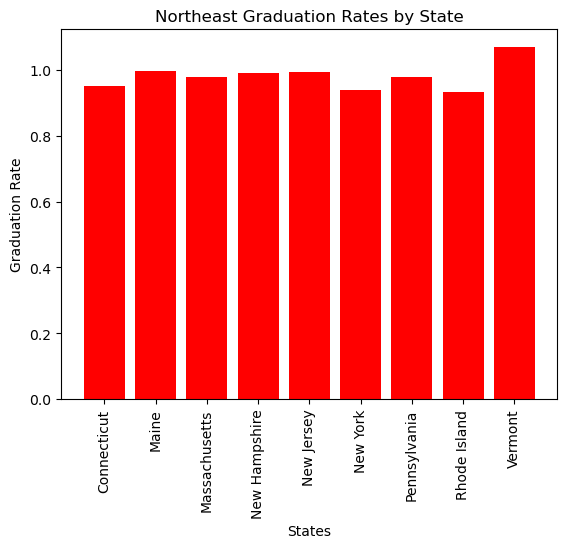

In [241]:
#find only northeast region and graph those states rates
northeast=merged_clean[merged_clean["Region"]=="Northeast"]
x_axis=northeast["State"]
y_axis=northeast["Graduation Rates"]
plt.xticks(rotation="vertical")
plt.bar(x_axis,y_axis,color="red")
plt.title("Northeast Graduation Rates by State")
plt.xlabel("States")
plt.ylabel("Graduation Rate")


Text(0, 0.5, 'Graduation Rate')

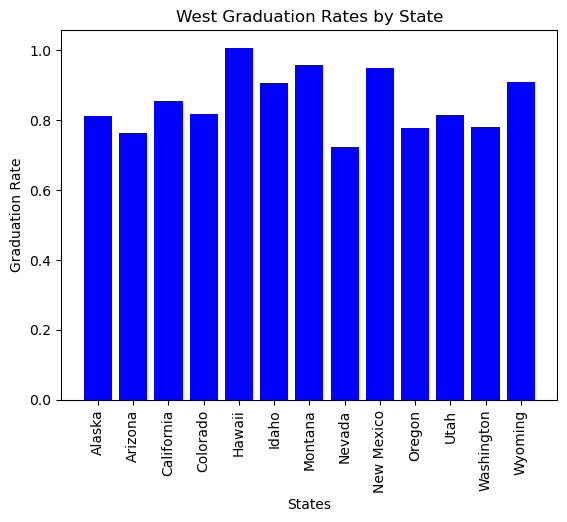

In [242]:
#find only west region and graph those states rates
west=merged_clean[merged_clean["Region"]=="West"]
x_axis=west["State"]
y_axis=west["Graduation Rates"]
plt.xticks(rotation="vertical")
plt.bar(x_axis,y_axis,color="blue")
plt.title("West Graduation Rates by State")
plt.xlabel("States")
plt.ylabel("Graduation Rate")

Text(0, 0.5, 'Graduation Rate')

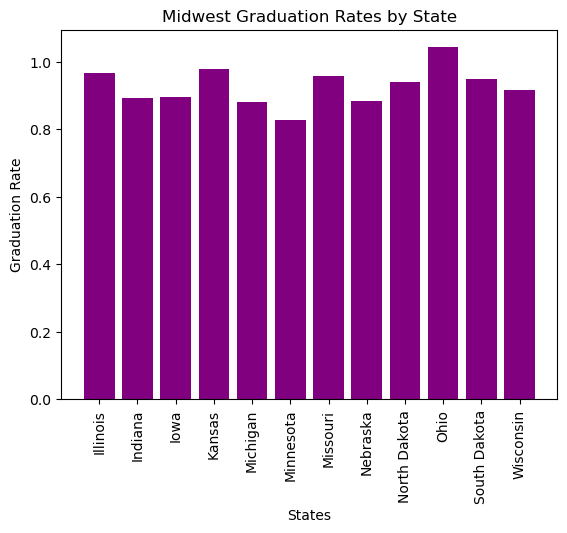

In [243]:
#find only midwest region and graph those states rates
midwest=merged_clean[merged_clean["Region"]=="Midwest"]
x_axis=midwest["State"]
y_axis=midwest["Graduation Rates"]
plt.xticks(rotation="vertical")
plt.bar(x_axis,y_axis,color="purple")
plt.title("Midwest Graduation Rates by State")
plt.xlabel("States")
plt.ylabel("Graduation Rate")

Text(0, 0.5, 'Graduation Rate')

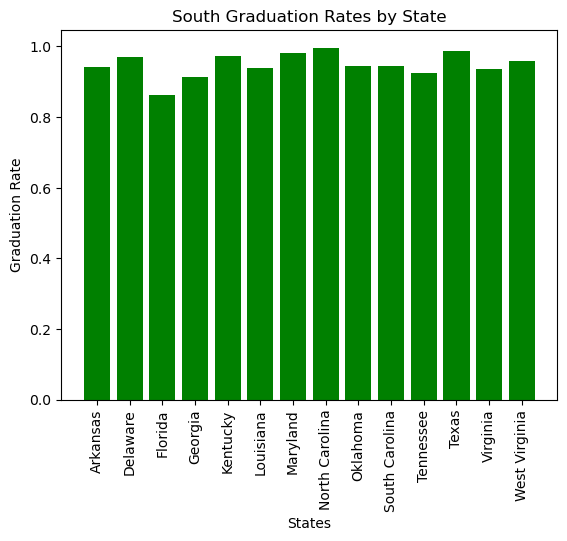

In [244]:
#find only south region and graph those states rates
south=merged_clean[merged_clean["Region"]=="South"]
x_axis=south["State"]
y_axis=south["Graduation Rates"]
plt.xticks(rotation="vertical")
plt.bar(x_axis,y_axis,color="green")
plt.title("South Graduation Rates by State")
plt.xlabel("States")
plt.ylabel("Graduation Rate")

In [245]:
#Create a Data Frame to view and graph the averages of each region
by_region=merged_clean["Graduation Rates"].groupby(merged_clean["Region"]).describe()
by_region=pd.DataFrame(by_region)  
by_region["Region"]=["Midwest","Northeast","South","West"]
by_region

,count,mean,std,min,25%,50%,75%,max,Region
Region,,,,,,,,,
Midwest,12.0,0.926719,0.056544,0.826289,0.889084,0.927544,0.959168,1.041714,Midwest
Northeast,9.0,0.981275,0.041022,0.933626,0.950396,0.977980,0.994383,1.070063,Northeast
South,14.0,0.948185,0.034519,0.862637,0.936913,0.944655,0.972711,0.996735,South
West,13.0,0.850769,0.086854,0.721313,0.778658,0.815605,0.909076,1.006436,West


In [262]:
us_average=by_region["mean"].mean()
round(us_average,3)

0.927

Text(0.5, 1.0, 'Average Graduation Rate per Region')

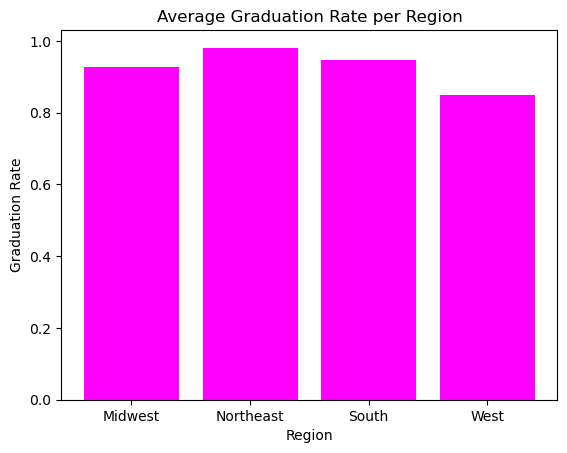

In [246]:
#plot the means of each region
x_axis=by_region["Region"]
y_axis=by_region["mean"]
plt.bar(x_axis,y_axis,color="magenta")
plt.xlabel("Region")
plt.ylabel("Graduation Rate")
plt.title("Average Graduation Rate per Region")

Text(0, 0.5, 'Graduation Rate')

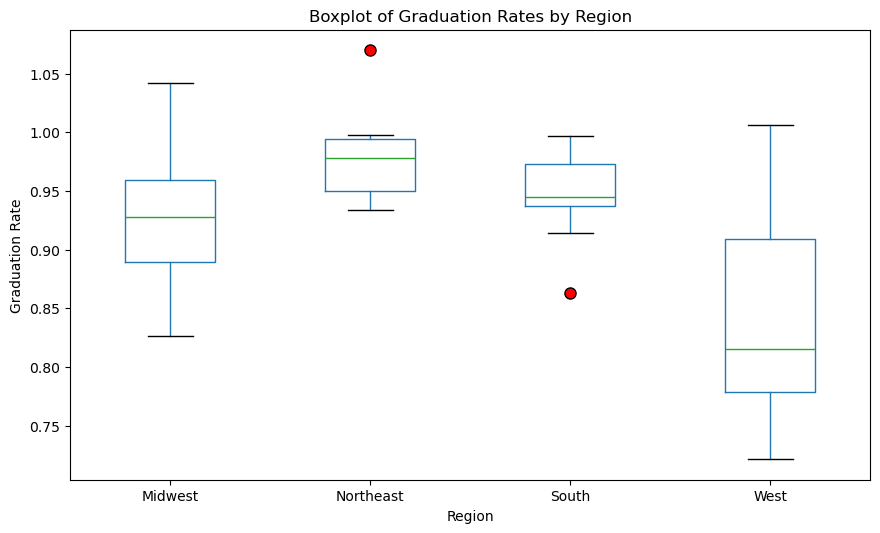

In [247]:
#boxplots of the regions on one figure 
merged_clean.boxplot(column='Graduation Rates', by='Region', 
                     grid=False, figsize=(10, 6),flierprops={
    "marker":"o",
    "markerfacecolor":"red",
    "markeredgecolor":"black",
    "markersize":8,
})

plt.suptitle("")
plt.title("Boxplot of Graduation Rates by Region")
plt.xlabel("Region")
plt.ylabel("Graduation Rate")

In [260]:
# Loop through each region to find and label outliers
for i, region in enumerate(merged_clean['Region'].unique()):
    # Filter the data for the current region
    y_data = merged_clean[merged_clean['Region'] == region]['Graduation Rates']
    
    # Calculate outliers
    Q1 = y_data.quantile(0.25)
    Q3 = y_data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers
    outliers = y_data[(y_data < lower_bound) | (y_data > upper_bound)]
    print(outliers)
#print the outliers found above
print(f"{merged_clean["State"][7]}({round(merged_clean["Graduation Rates"][7],2)}) and {merged_clean["State"][42]}({round(merged_clean["Graduation Rates"][42],2)}) are outliers")

Series([], Name: Graduation Rates, dtype: float64)
7    0.862637
Name: Graduation Rates, dtype: float64
42    1.070063
Name: Graduation Rates, dtype: float64
Series([], Name: Graduation Rates, dtype: float64)
Florida(0.86) and Vermont(1.07) are outliers


In [259]:
min_rate=merged_clean["Graduation Rates"].min()
max_rate=merged_clean["Graduation Rates"].max()
min_state = merged_clean.loc[merged_clean["Graduation Rates"] == min_rate, "State"].values[0]
max_state= merged_clean.loc[merged_clean["Graduation Rates"] == max_rate, "State"].values[0]
print(f"{max_state} has the max grad rate of {round(max_rate,2)} while {min_state} has the lowest grad rate of {round(min_rate,2)}")

Vermont has the max grad rate of 1.07 while Nevada has the lowest grad rate of 0.72


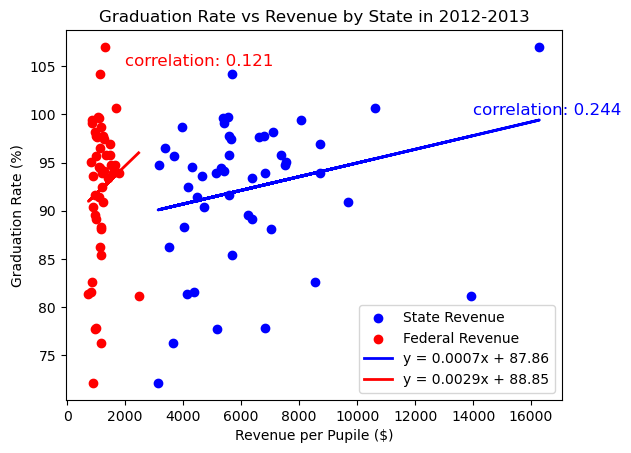

In [215]:
#plot graduation rate verses state and federal revenue per pupil on 
# the same figure and do linear regressions
import numpy as np
x_1=merged_clean["State Revenue Per Pupil"]
x_2=merged_clean["Federal Revenue Per Pupil"]
y=merged_clean["Graduation Rates"]*100

slope1, intercept1, rvalue1, pvalue1, stderr1 = linregress(x_1, y)
line_eq1 = f"y = {slope1:.4f}x + {intercept1:.2f}"
slope2, intercept2, rvalue2, pvalue2, stderr2 = linregress(x_2, y)
line_eq2 = f"y = {slope2:.4f}x + {intercept2:.2f}"

fig,ax=plt.subplots()
ax.scatter(x_1,y,color="blue",label="State Revenue")
ax.scatter(x_2,y,color="red",label="Federal Revenue")

regress_values1 = slope1 * x_1 + intercept1
ax.plot(x_1, regress_values1, color="blue", linewidth=2, label=line_eq1)
regress_values2 = slope2 * x_2 + intercept2
ax.plot(x_2, regress_values2, color="red", linewidth=2, label=line_eq2)

correlation1 = round(st.pearsonr(x_1, y)[0],3)
correlation2 = round(st.pearsonr(x_2, y)[0],3)

ax.annotate(f"correlation: {correlation1}", (14000,100), fontsize=12, color="blue") 
ax.annotate(f"correlation: {correlation2}",(2000,105), fontsize=12, color="red")

plt.xlabel("Revenue per Pupile ($)")
plt.ylabel("Graduation Rate (%)")
plt.title("Graduation Rate vs Revenue by State in 2012-2013")
ax.legend()
plt.show()

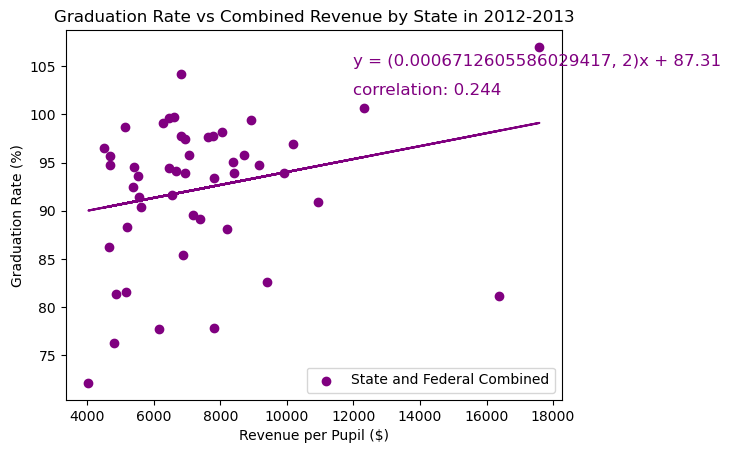

0.244


In [216]:
#plot the combined state and federal versus graduation rate and do a linear regression
x_values=merged_clean["Combined Federal and State Revenue Per Pupil"]
y_values=merged_clean["Graduation Rates"]*100
plt.scatter(x_values,y_values,color="purple",label="State and Federal Combined")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str((slope,2)) + "x + " + str(round(intercept,2))
correlation = round(st.pearsonr(x_values,y_values)[0],3)
plt.annotate(f"correlation: {correlation}",(12000,102),fontsize=12,color="purple")
plt.annotate(line_eq,(12000,105),fontsize=12,color="purple")
plt.plot(x_values,regress_values,color="purple")
plt.legend(loc="lower right")
plt.xlabel("Revenue per Pupil ($)")
plt.ylabel("Graduation Rate (%)")
plt.title("Graduation Rate vs Combined Revenue by State in 2012-2013")
plt.show()
print(correlation)

In [217]:
# Identify rows with graduation rates > 1
anomalous_rows = merged_clean[merged_clean["Graduation Rates"] > 1]
print("Anomalous Rows:")
print(anomalous_rows)

# Correct graduation rates > 1
merged_clean.loc[merged_clean["Graduation Rates"] > 1, "Graduation Rates"] /= 100

Anomalous Rows:
    index    State  Graduates  State Revenue Per Pupil  \
9      10   Hawaii    10790.0                  10625.0   
32     34     Ohio   122491.0                   5683.0   
42     44  Vermont     6491.0                  16284.0   

    Federal Revenue Per Pupil  Pupil to Teacher Ratio  Grade 12 Students  \
9                      1682.0                   15.92            10721.0   
32                     1124.0                   16.32           117586.0   
42                     1304.0                   10.67             6066.0   

    Graduation Rates  Combined Federal and State Revenue Per Pupil     Region  
9           1.006436                                       12307.0       West  
32          1.041714                                        6807.0    Midwest  
42          1.070063                                       17588.0  Northeast  


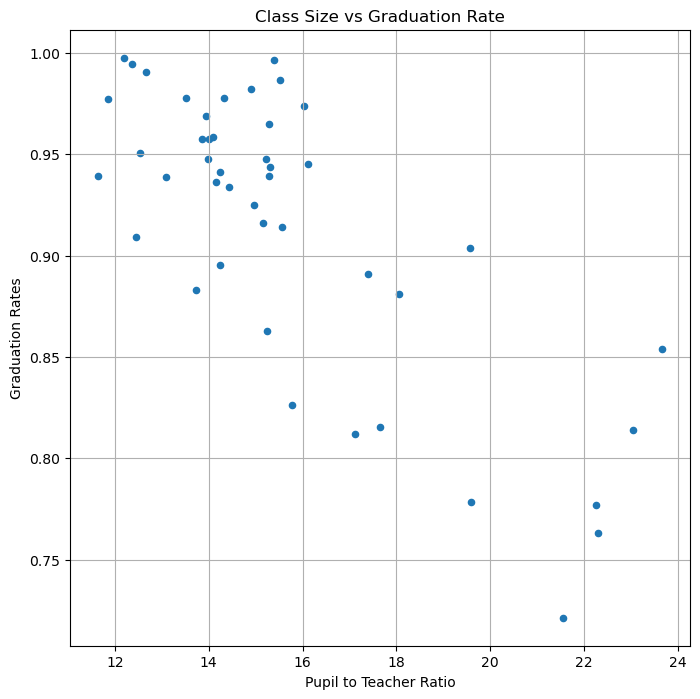

In [218]:
# Create a scatter plot which compares MPG to horsepower
merged_clean = merged_clean.loc[merged_clean['Graduation Rates'] >.6]
merged_clean.plot(kind="scatter", x="Pupil to Teacher Ratio", y="Graduation Rates", grid=True, figsize=(8,8),
              title="Class Size vs Graduation Rate")

plt.show()


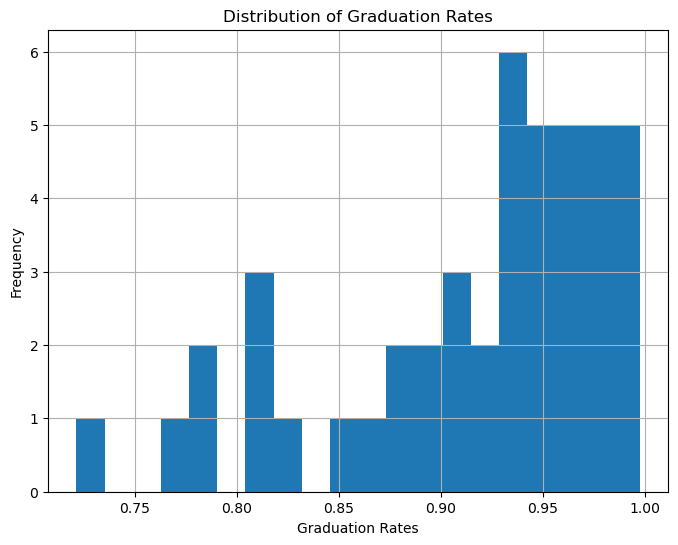

In [219]:
merged_clean["Graduation Rates"].hist(bins=20, figsize=(8, 6))
plt.title("Distribution of Graduation Rates")
plt.xlabel("Graduation Rates")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

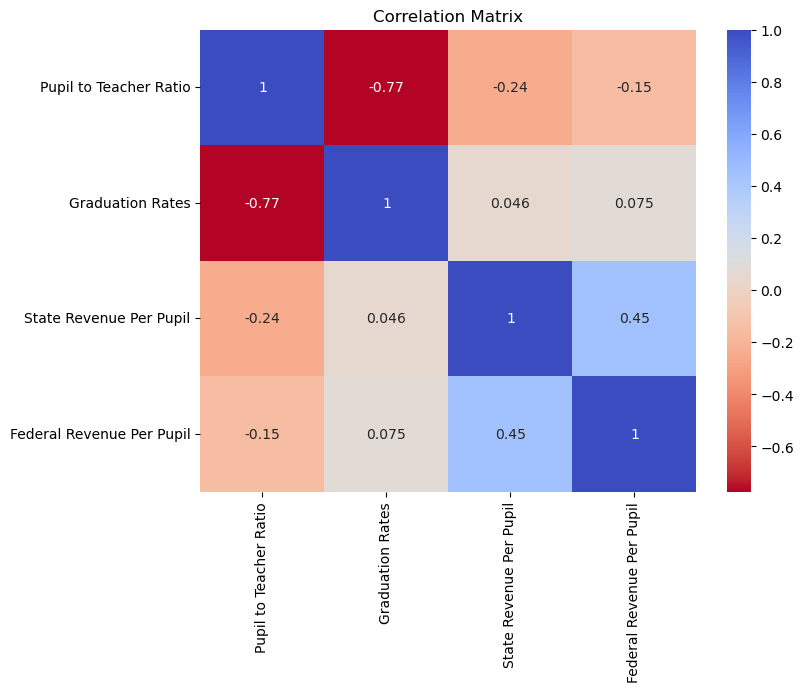

In [220]:
import seaborn as sns
# Correlation matrix
correlation_matrix = merged_clean[["Pupil to Teacher Ratio", "Graduation Rates", "State Revenue Per Pupil", "Federal Revenue Per Pupil"]].corr()

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm_r")
plt.title("Correlation Matrix")
plt.show()

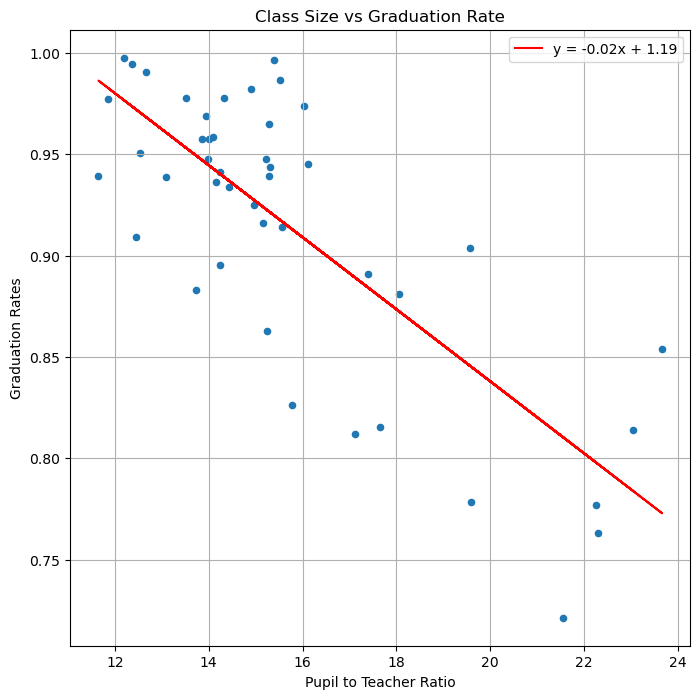

Correlation Coefficient (r): -0.77


In [221]:
# Scatter plot
merged_clean.plot(kind="scatter", x="Pupil to Teacher Ratio", y="Graduation Rates", grid=True, figsize=(8, 8),
            title="Class Size vs Graduation Rate")

# Get x and y data
x = merged_clean["Pupil to Teacher Ratio"]
y = merged_clean["Graduation Rates"]

# Fit the line of best fit
m, b = np.polyfit(x, y, 1)  # Linear fit (1 = degree of polynomial)

# Plot the line of best fit
plt.plot(x, m * x + b, color="red", label=f"y = {m:.2f}x + {b:.2f}")

# Add legend
plt.legend()

# Show plot
plt.show()

# Print R-value
correlation = x.corr(y)

print(f"Correlation Coefficient (r): {correlation:.2f}")